In [1]:
#Download the tools for downloading the dataset directly from the google drive.
#This can save a lot of time.
!pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1qTTTaHAp8HOnvxnKi1RXp-bC7sito9DF


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Processing file 1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI 1.training.zip
Processing file 1o5IEwLwNfrsbOTxK2Tjo1btGjjoUsecT 2.validation.zip
Processing file 1hZn3ZwgzIiHT2poxc6lNVslZVKk3aQyB 3.testing.zip
Processing file 1oKVhiJWSyFQT2x0GI0NCYd02hNWgzsVS mask.zip
Building directory structure completed


Retrieving folder list
Retrieving folder list completed
Building directory structure
Downloading...
From (uriginal): https://drive.google.com/uc?id=1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI
From (redirected): https://drive.google.com/uc?id=1Pz46-yHnziPzPBS-W_rTLsgzP_lDpLyI&confirm=t&uuid=439270ff-2b35-4eff-b098-c8feeca4c310
To: c:\Users\ned20\Documents\GitHub\CPSC_599_PROJECT\WSSS4LUAD\1.training.zip

  0%|          | 0.00/1.23G [00:00<?, ?B/s]
  0%|          | 524k/1.23G [00:00<04:38, 4.40MB/s]
  0%|          | 5.24M/1.23G [00:00<00:44, 27.2MB/s]
  1%|          | 8.39M/1.23G [00:00<00:42, 28.5MB/s]
  1%|          | 11.5M/1.23G [00:00<00:47, 25.8MB/s]
  1%|▏         | 18.4M/1.23G [00:00<00:34, 35.4MB/s]
  2%|▏         | 23.6M/1.23G [00:00<00:30, 39.6MB/s]
  2%|▏         | 28.3M/1.23G [00:00<00:29, 41.2MB/s]
  3%|▎         | 33.6M/1.23G [00:00<00:27, 42.9MB/s]
  3%|▎         | 38.3M/1.23G [00:01<00:27, 43.4MB/s]
  4%|▎         | 43.5M/1.23G [00:01<00:26, 45.4MB/s]
  4%|▍         | 48.2M/1.23G [

In [2]:
#Unzip
!tar -xf ./WSSS4LUAD/1.training.zip

In [3]:
!ls -al ./WSSS4LUAD

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!pip install torch
!pip install matplotlib
!pip install torchvision
!pip install sklearn

You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [5]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\ned20\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:

import glob
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split, Dataset, Subset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch import nn, optim
import os
from PIL import Image
from torch.utils.data import Dataset
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
from torch.utils.data import WeightedRandomSampler

In [7]:
#TODO: Implement the DigitDataset class here
class DigitDataset(Dataset):
  def __init__(self, path, transformation=None):
    self.path = path
    self.transformation = transformation
    self.allFiles = []
    for name1 in os.listdir(self.path):
      if (name1.endswith(".png")):
        self.allFiles.append(self.path + "/" + name1)
    print(self.allFiles)
  def __len__(self):
    return len(self.allFiles)
  def __getitem__(self, index):
    if index >= len(self.allFiles):
      return None, None
    image = Image.open(self.allFiles[index])
    temp = self.allFiles[index].split("/")
    filename = re.sub("[^0-9]", "", temp[-1].split("-")[-1])
    label = int(filename, 2)
    if self.transformation != None:
      image = self.transformation(image)
    return image, label

In [8]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor()
    ])
def getSampler(dataset):
  unique, counts = np.unique(dataset, return_counts=True)
  result = {}
  for n in range(len(counts)):
    result[unique[n]] = 1/counts[n]

  return result
training = DigitDataset("./1.training", transform)


X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(list(training[i][0] for i in range(len(training))), list(training[i][1] for i in range(len(training))),np.arange(len(training)), test_size=0.2)


training_set = Subset(training, idx1)
validation_set = Subset(training, idx2)


training_dict = getSampler(list(training_set[i][1] for i in range(len(training_set))))
training_dict[7] = 0
print(training_dict)
weightedSampling_training = WeightedRandomSampler( list(training_dict[training_set[i][1]] for i in range(len(training_set))), len(training_set) )


validation_dict = getSampler(list(validation_set[i][1] for i in range(len(validation_set))))
validation_dict[7] = 0
print(validation_dict)
weightedSampling_validation = WeightedRandomSampler( list(validation_dict[validation_set[i][1]] for i in range(len(validation_set))), len(validation_set) )



#See the distribution
ll = []
for n in os.listdir("./1.training"):
  element = re.sub("[^0-9]", "", n.split("-")[-1])
  if (element == ''):
    print(n)
  ll.append(element)
c = Counter( ll )

print( c.items() )


['./1.training/1003370-11223-11698-[1, 1, 0].png', './1.training/1003370-11223-18822-[1, 1, 0].png', './1.training/1003370-11223-20603-[1, 1, 0].png', './1.training/1003370-11223-33070-[1, 1, 0].png', './1.training/1003370-11223-34851-[1, 1, 0].png', './1.training/1003370-11223-36632-[1, 1, 0].png', './1.training/1003370-11223-43756-[0, 1, 0].png', './1.training/1003370-13087-11698-[0, 1, 0].png', './1.training/1003370-13087-20603-[1, 1, 0].png', './1.training/1003370-13087-27727-[0, 1, 0].png', './1.training/1003370-13087-31289-[0, 1, 0].png', './1.training/1003370-13087-36632-[0, 1, 0].png', './1.training/1003370-13087-49099-[0, 1, 0].png', './1.training/1003370-13087-50880-[0, 1, 0].png', './1.training/1003370-14951-13479-[0, 1, 0].png', './1.training/1003370-14951-17041-[1, 1, 0].png', './1.training/1003370-14951-20603-[0, 1, 0].png', './1.training/1003370-14951-38413-[0, 1, 0].png', './1.training/1003370-14951-40194-[0, 1, 0].png', './1.training/1003370-14951-52661-[0, 1, 0].png',

Total Number of Images 0
Total Number of Images 1474
Total Number of Images 1304
Total Number of Images 0
Total Number of Images 928
Total Number of Images 4
Total Number of Images 4361
Total Number of Images 1


IndexError: list index out of range

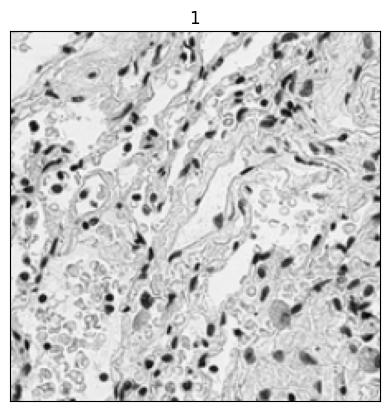

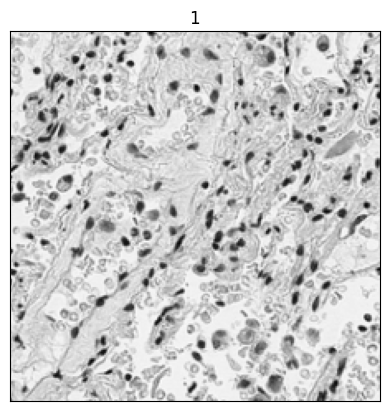

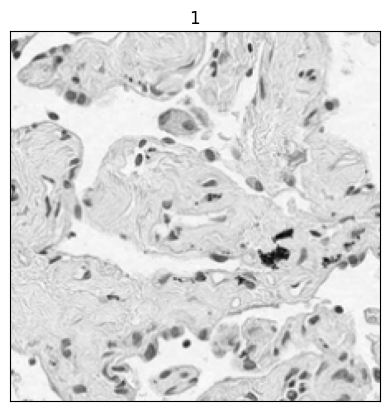

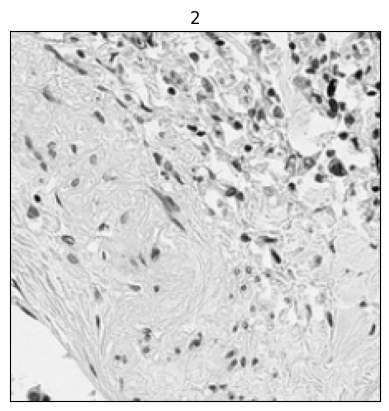

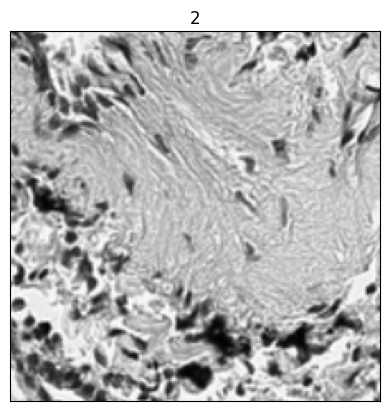

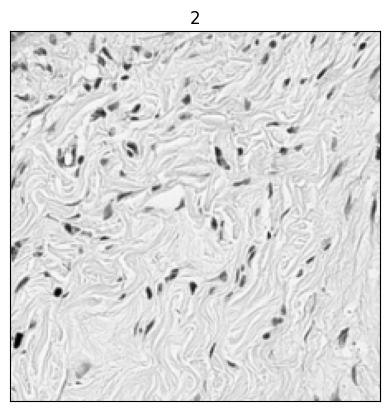

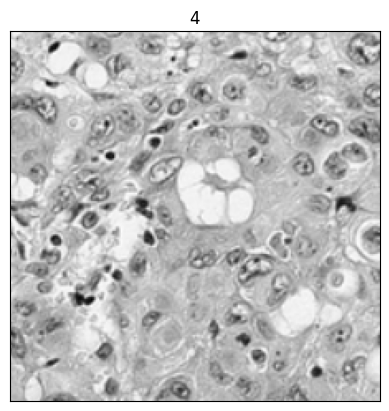

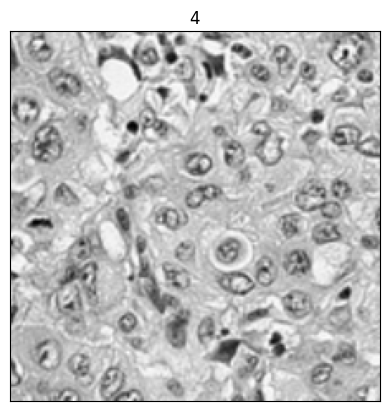

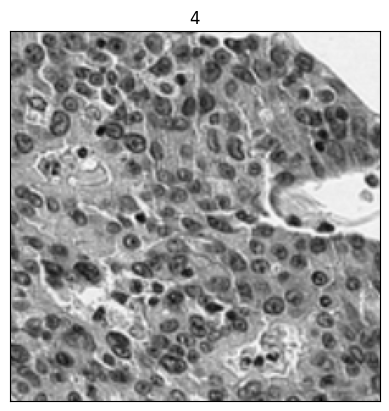

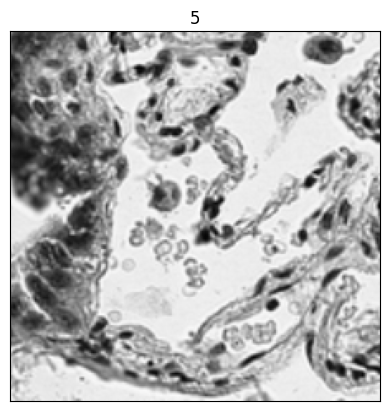

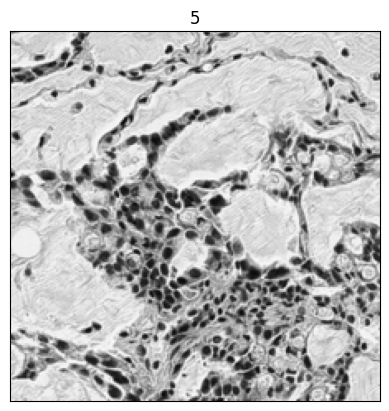

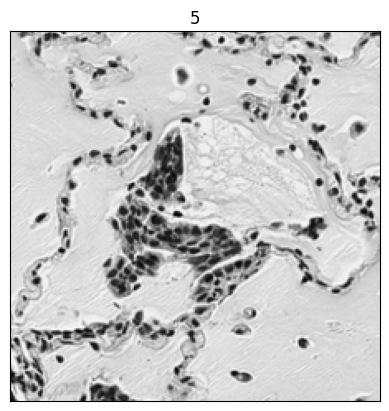

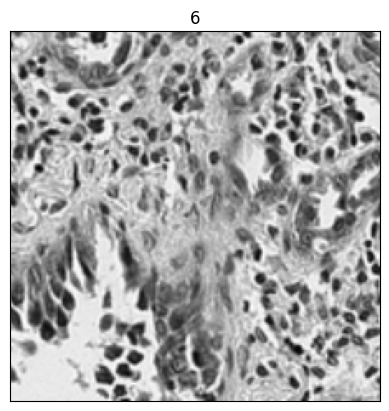

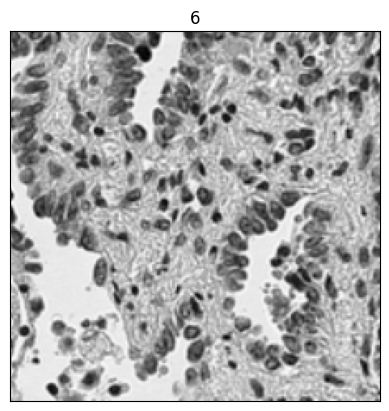

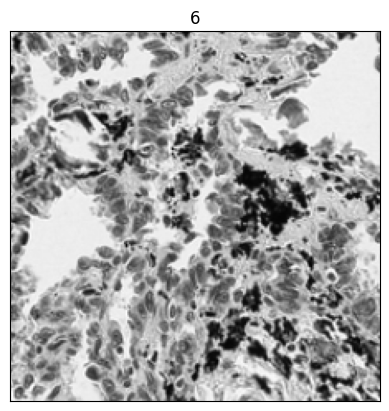

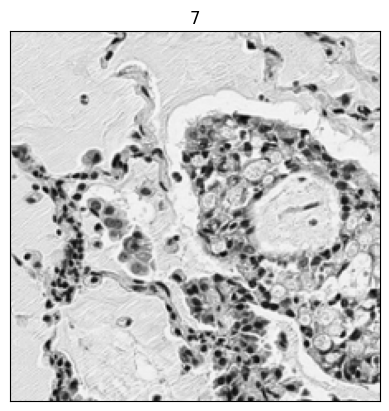

In [17]:
#From Class
def visualize(image, label):
  plt.figure()
  plt.imshow(image, cmap='gray')
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])

for i in range(8):

  groupImages = list(filter(lambda x: x[1] ==i, training_set))
  print("Total Number of Images", len(groupImages))
  if (len(groupImages) > 0):
    for j in range(1):
        visualize(groupImages[j][0].numpy()[0], groupImages[j][1])

In [14]:
class AlexNet(nn.Module):
    def __init__(self, num_channels, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=3),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=6*6*256, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=num_classes)
        )


    def forward(self, x):
      x = self.features(x)
      x = self.flatten(x)
      x = self.classifier(x)
      return x

In [10]:
batch_size = 64
data_loader_training = DataLoader(training_set, batch_size=batch_size, sampler=weightedSampling_training)
data_loader_validate = DataLoader(validation_set, batch_size=batch_size, sampler=weightedSampling_validation)

In [16]:
#TODO implement

def evaluation(model, loader, criterion, device, phase='Valid'):
  model.eval()
  predictions = []
  ground_truth = []
  with torch.no_grad():
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(loader):
      #images = images.to(device)
      #labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      predictions.extend(preds.cpu().numpy())
      ground_truth.extend(labels.cpu().numpy())
      correct += (preds == labels).sum().item()
    accuracy = correct / total
    loss = total_loss / total
    print(f'     {phase} Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    return {'loss': loss,
            'accuracy': accuracy,
            'ground_truth': ground_truth,
            'predictions': predictions}

#Training function
#model = the inital model we want to train
#training= training dataset loader
#validation = validation dataset loader
#criterion = Cross entropy loss
#optimizer = optimizer
#epoches = number of times we need to train the model
def training(model, train_loader, valid_loader, criterion, optimizer, device,
             epochs, best_model_path):
  model.train()
  best_loss = torch.inf
  best_restults = None
  for epoch in range(epochs):
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(train_loader):
      optimizer.zero_grad()
      #images = images.to(device)
      #labels = labels.to(device)
      outputs = model(images)
      print("outputs", outputs)
      print("labels", labels)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      correct += (preds == labels).sum().item()
    accuracy = correct / total
    loss = total_loss / total
    print(f'{epoch:<4} Train Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    results = evaluation(model, valid_loader, criterion, device)
    if results['loss'] < best_loss:
      torch.save(model, best_model_path)
      best_loss = results['loss']
      best_restults = results
    print()
  return best_restults

In [17]:
model = AlexNet(6,8)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
epoches = 10

best_model_path = 'best_model.pt'
best_restults = training(model, data_loader_training, data_loader_validate, criterion,
                         optimizer, "", epoches, best_model_path)

KeyboardInterrupt: 

In [15]:
train_function(model, data_loader_training, data_loader_validate, criterion, optimizer, epoches)

outputs tensor([[-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        [-0.1330,  0.1067,  0.0866, -0.1369,  0.0960,  0.1195,  0.0899, -0.1532],
        

KeyboardInterrupt: 